# Boston Housing Prices Prediction Notebook

## Introduction
This Jupyter Notebook demonstrates a machine learning workflow to predict house prices in Boston using the **Boston Housing Dataset**.

## Objectives
- Explore and visualize the dataset to identify key patterns and correlations.
- Preprocess the data to handle missing values and scale features.
- Train and evaluate regression models, including Linear Regression and Random Forest.
- Interpret results to understand feature importance and model performance.

## Dataset
The [Boston Housing Dataset](https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd) is used, with features like:
- **PTRATIO**: Ratio of students to teachers in primary and secondary schools in the neighbourhood
- **RM**: Average number of rooms per dwelling
- **LSTAT**: Percentage of lower-status population
- **MEDV**: Median house price (in $1000s, target variable)

## Workflow
1. **Data Loading and Exploration**:
   - Load the dataset using pandas.
   - Visualize distributions and correlations (e.g., heatmap, scatter plots).
2. **Preprocessing**:
   - Check for missing values and outliers.
   - Normalize numerical features using StandardScaler.
   - Split data into training (80%) and testing (20%) sets.
3. **Modeling**:
   - Train a Linear Regression model as a baseline.
   - Train a Random Forest model for improved performance.
   - Hyperparameter tuning using GridSearchCV (optional).
4. **Evaluation**:
   - Compute Mean Squared Error (MSE) and R² score.
   - Visualize predicted vs. actual prices.
   - Analyze feature importance for Random Forest.
5. **Conclusion**:
   - Summarize model performance and key findings.
   - Discuss limitations and potential improvements.

## Expected Outcomes
- Understand the relationship between housing features and prices.
- Compare the performance of simple (Linear Regression) vs. complex (Random Forest) models.
- Gain hands-on experience with data preprocessing, model training, and evaluation.


In [17]:
# Importing 
import pandas as pd

In [18]:
# Reading the dataset and taking a look at it
df = pd.read_csv("../data/housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [19]:
# let's check for missing values...
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [20]:
df["RM"].sort_values()

353    3.561
355    3.863
389    4.138
357    4.138
367    4.368
       ...  
225    8.247
245    8.259
217    8.266
224    8.337
253    8.398
Name: RM, Length: 489, dtype: float64

In [21]:
df["MEDV"].sort_values()

388     105000.0
381     105000.0
383     117600.0
382     132300.0
472     147000.0
         ...    
272     966000.0
220     980700.0
225    1014300.0
197    1018500.0
253    1024800.0
Name: MEDV, Length: 489, dtype: float64

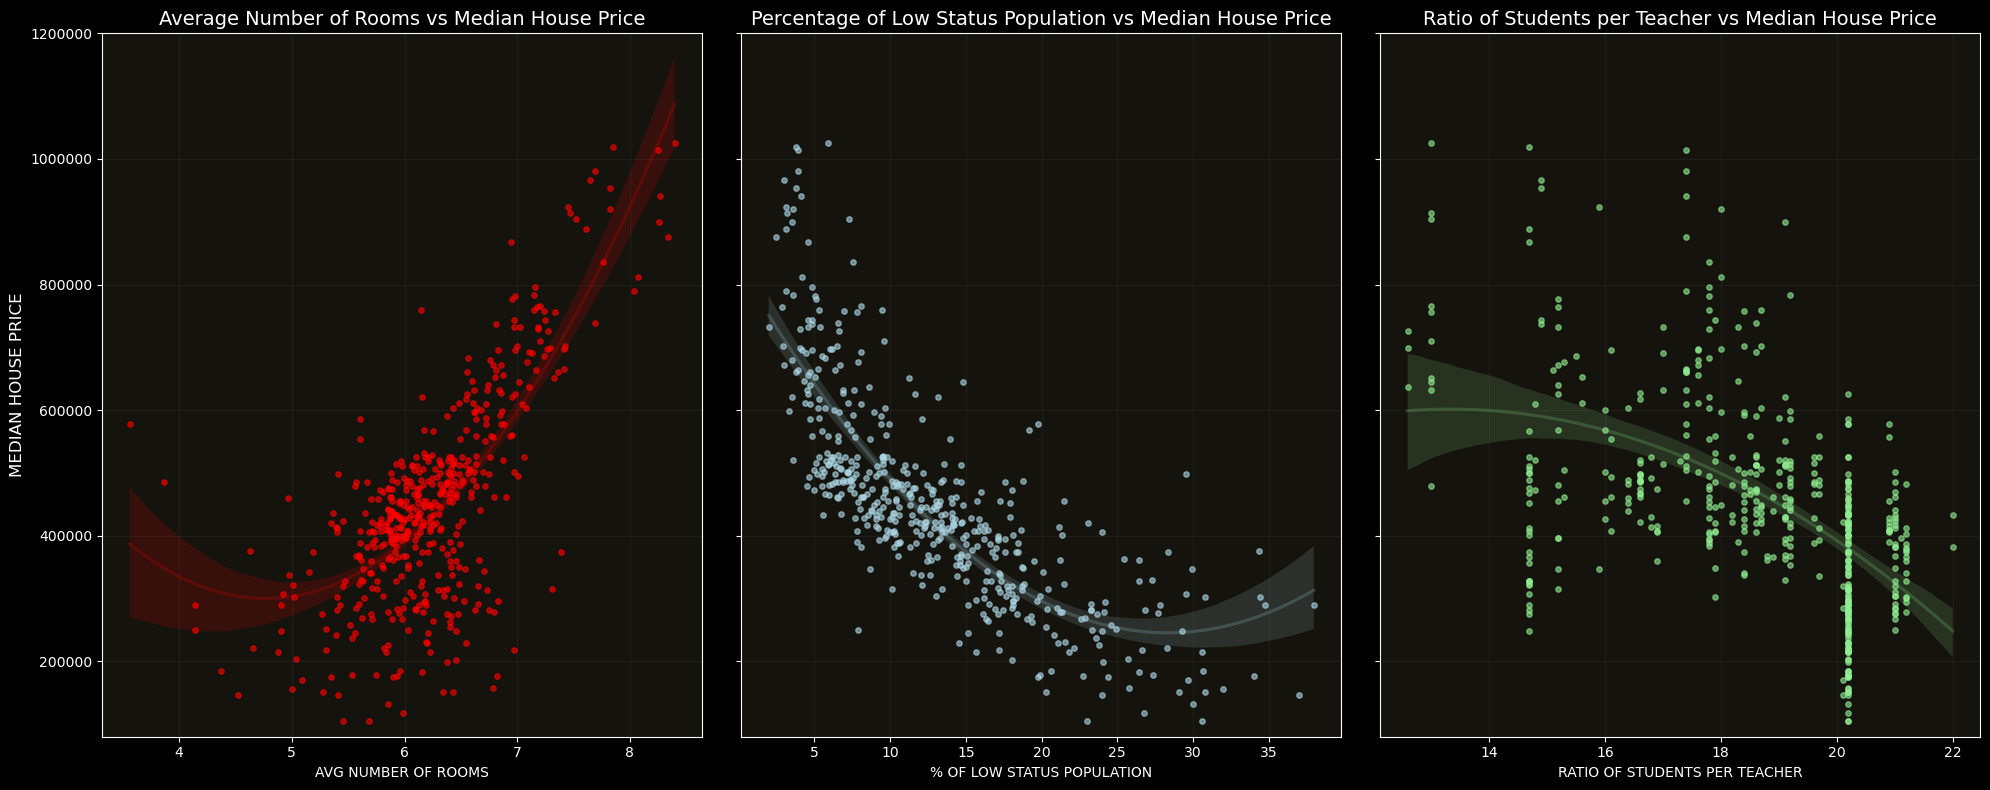

In [22]:
# as there's no missing values, let's look for correlations and distributions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting up the plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize= (20,8), facecolor="#000000", sharey=True)

# First let's plot RM vs MEDV (avg number of rooms vs price)
sns.regplot(x="RM", y="MEDV", data=df, order=2, ax=ax1 ,scatter_kws={"color": "red", "alpha": 0.6, "s": 15}, line_kws={"color": "red", "linestyle": "-", "alpha":0.2})
ax1.set_title("Average Number of Rooms vs Median House Price", color="white", fontsize = 14)
ax1.tick_params(colors="white")
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.set_xlabel("AVG NUMBER OF ROOMS", color= "white")
ax1.set_ylabel("MEDIAN HOUSE PRICE", color = "white", fontsize=12)
ax1.set_facecolor("#15130d")
ax1.grid("True", color = "gray", alpha = 0.1)
ax1.set_ylim(80000, 1200000)
for spine in ax1.spines.values():
        spine.set_color("white")

# Then Let's plot the correlation of the percentage of low status population vs house pricing
sns.regplot(x="LSTAT", y="MEDV", data=df, order=2, ax=ax2, scatter_kws={"color":"lightblue", "alpha": 0.6, "s": 15}, line_kws={"color": "lightblue", "linestyle": "-", "alpha": 0.2})
ax2.set_title("Percentage of Low Status Population vs Median House Price", color = "white", fontsize = 14)
ax2.tick_params(colors= "white")
ax2.set_xlabel("% OF LOW STATUS POPULATION", color = "white")
ax2.set_facecolor("#15130d")
ax2.grid("True", color = "gray", alpha = 0.1)
for spine in ax2.spines.values():
        spine.set_color("white")

# Last but not least, let's plot the correlation between the ratio of students per teacher and the house prices
sns.regplot(x="PTRATIO", y="MEDV", data=df, order=2, ax=ax3, scatter_kws={"color":"lightgreen", "alpha": 0.6, "s": 15}, line_kws={"color": "lightgreen", "linestyle": "-", "alpha": 0.2})
ax3.set_title("Ratio of Students per Teacher vs Median House Price", color = "white", fontsize = 14)
ax3.tick_params(colors= "white")
ax3.set_xlabel("RATIO OF STUDENTS PER TEACHER", color = "white")
ax3.set_facecolor("#15130d")
ax3.grid("True", color = "gray", alpha = 0.1)
for spine in ax3.spines.values():
        spine.set_color("white")

plt.tight_layout()

Based on this plots we can say a few things:
1. We can see a **positive** correlation between the average number of rooms and the price of the house, which makes sense because when a house has more rooms, it must be bigger, so the price will be a lot higher that a house with less rooms.
2. From the second plot we can see that there's a **negative** correlation between the percentage of low status population and the price of the house, that also makes sense because of the demand in the market about houses where there's a low chance of selling it (because of the low status population).
3. And from the third plot we can see a slightly **negative** correlation, that means that when the PTRATIO is low, meaning that the teachers will have less students in charge, which can affect positively on the student education, the higher the price of the house is.

---  

## Machine Learning


Now that we've analyzed a bit of the data, we can say that we're ready to make our **Machine Learning** model.  
On this case we're going to try two regression models:
* Linear Regression 
* Random Forest Regressor  

Let's get to it!

In [23]:
# First we have to normalize the data, we're going to do that by using the StandardScaler() function
from sklearn.preprocessing import StandardScaler

preprocessor = StandardScaler()

# Split the data into X & y (data and target)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Standarization
scale = preprocessor.fit_transform(X)

In [24]:
# Now let's split the data into train and test, but using the scale variable that we've tranformed
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale, y, test_size=0.2, random_state=42)

In [25]:
# Once we've done this, let's test which model it's the best on this
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

#Importing regression metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
# Now we're going to fit each model and score it
for name, model in models.items():
    print(f"\n{name}: \n")
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    # Evaluating model
    r2_baseline = r2_score(y_test, y_preds)
    mae_baseline = mean_absolute_error(y_test, y_preds)
    mse_baseline = mean_squared_error(y_test, y_preds)
    print(f"R2 Score: {r2_baseline} -- Mean Absolute Error: {mae_baseline} -- Mean Squared Error: {mse_baseline}")


Linear Regression: 

R2 Score: 0.6910934003098512 -- Mean Absolute Error: 64277.288656703386 -- Mean Squared Error: 6789025559.265889

Random Forest: 

R2 Score: 0.851872873404737 -- Mean Absolute Error: 43799.57142857143 -- Mean Squared Error: 3255478677.0


We clearly see that the random forest it's better when it comes to predict house pricing, but there's a lot of space to improve because we have a absolute error of `43799` which is pretty high still, so now to improve this, we have to do some hyperparameter tuning on the random forest...

In [27]:
# Let's get into the hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestRegressor(random_state=42)

grid_search_model = GridSearchCV(clf, grid, cv=10, n_jobs=-1)
grid_search_model.fit(X_train, y_train)
print(f"Best Parameters: {grid_search_model.best_params_}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Now we are ready to score again our model but now with the best parameters
y_preds_gs_model = grid_search_model.predict(X_test)

r2 = r2_score(y_test, y_preds_gs_model)
mae = mean_absolute_error(y_test, y_preds_gs_model)
mse = mean_squared_error(y_test, y_preds_gs_model)
print(f"R2 Score: {r2} -- Mean Absolute Error: {mae} -- Mean Squared Error: {mse}")

R2 Score: 0.86203985814683 -- Mean Absolute Error: 42104.45585148396 -- Mean Squared Error: 3032032757.2819676


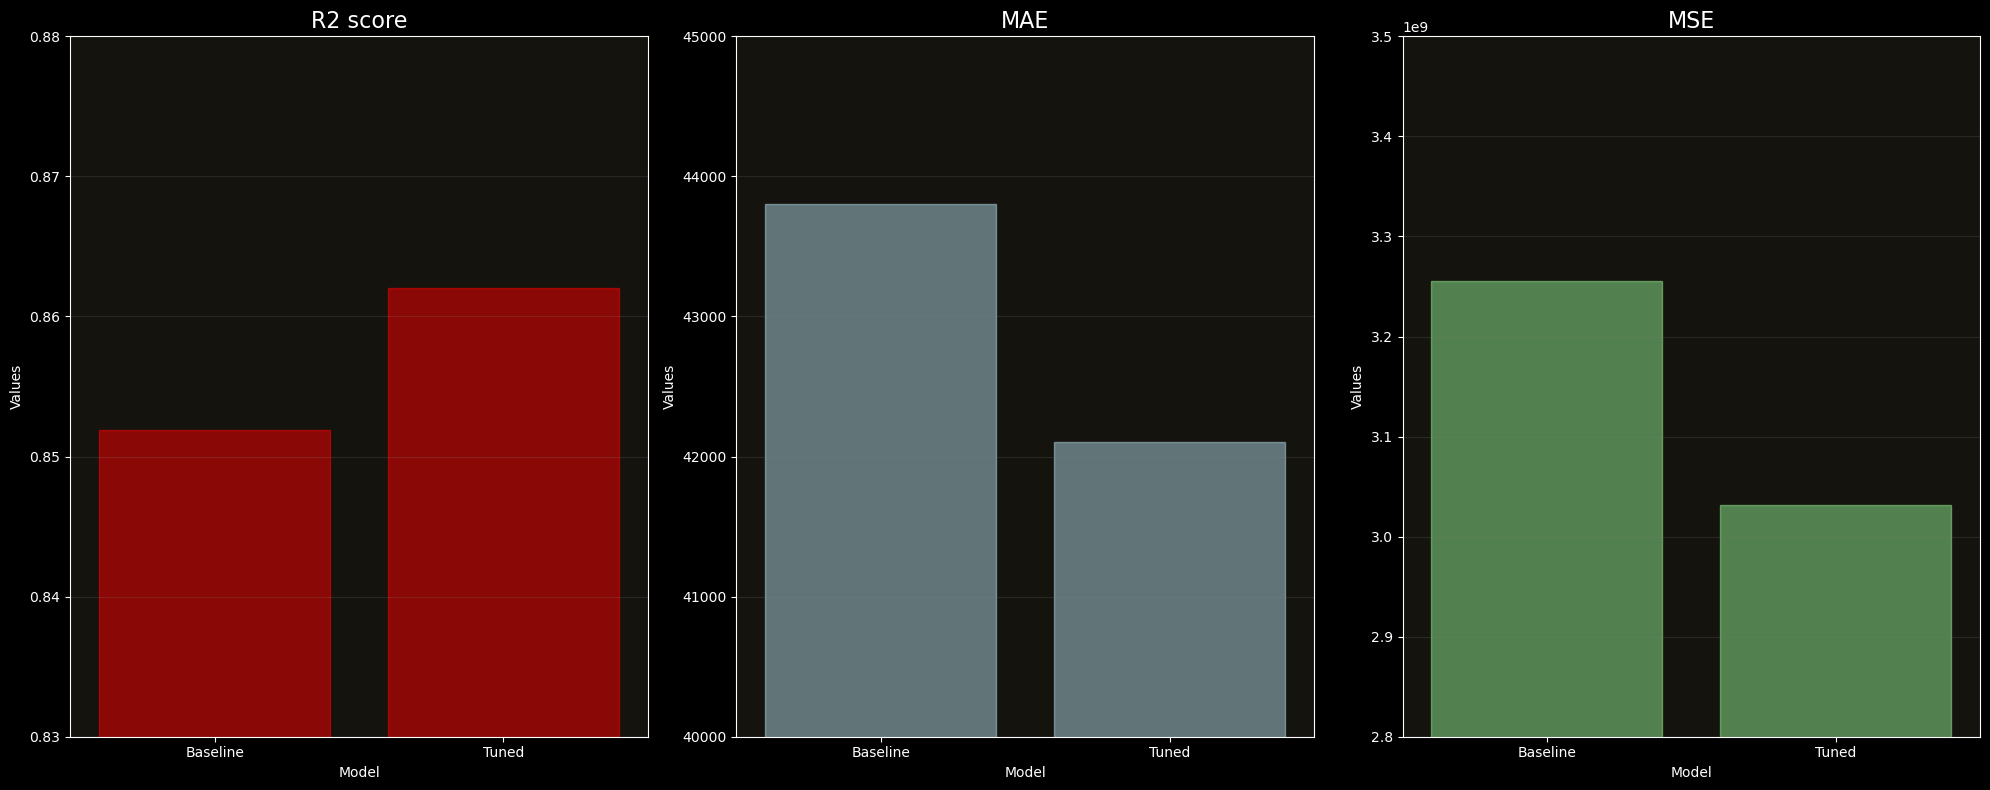

In [29]:
# Lets plot the difference between the baseline model and the tuned model
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize = (20,8), facecolor = "#000000", sharex=True)

metrics = ["R2 score", "MAE", "MSE"]
baseline_metrics = [r2_baseline, mae_baseline, mse_baseline]
tuned_metrics = [r2, mae, mse]
m = ["Baseline", "Tuned"]

axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    df = pd.DataFrame({
        "Model": m,
        "Values": [baseline_metrics[i], tuned_metrics[i]]
    })
    
    sns.barplot(data=df, x="Model", y="Values", ax=ax)

    ax.set_title(metrics[i], color="white", fontsize=16)
    ax.set_facecolor("#15130d")
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(True, color="gray", alpha= 0.2, axis="y")
    for spine in ax.spines.values():
        spine.set_color("white")

ax1.set_ylim(0.83, 0.88)
ax2.set_ylim(40000, 45000)
ax3.set_ylim(2.8e9, 3.5e9)

subplot_colors = ["red", "lightblue", "lightgreen"]

for ax, color in zip(axes, subplot_colors):
    for bar in ax.patches:
        bar.set_color(color)
        bar.set_alpha(0.5)
        
        

plt.tight_layout()


* `R2 Score:` Improved from 0.8519 to 0.8620, indicating a slight enhancement in the model's ability to explain the variance in the data.
* `MAE:` Decreased from 43799.57 to 42104.46, reflecting a reduction in average prediction error by approximately 1695 units. However, it's pretty high still, for example, if we had a $300.000 house, the error would be $42104, which means almost 15%, that it's not a very consistent 
* `MSE:` Dropped from 3,255,478,677 to 3,032,032,757, showing a slight decrease in the squared error magnitude by about 223 million units, which may look like much but it's not compared to the total value...
Overall, hyperparameter tuning has led to modest but consistent improvements across all metrics, suggesting better model generalization and reduced error, though the impact appears incremental.

In [31]:
# Now let's plot the feature importances
clf = RandomForestRegressor(max_depth = 20, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100, random_state=42)

clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, random_state=42)

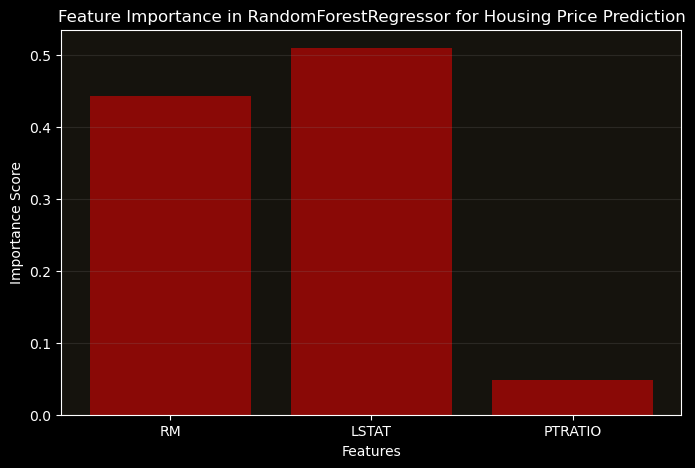

In [61]:
df = pd.read_csv("../data/housing.csv")

features = df.drop("MEDV", axis=1).columns.to_list()
importances = clf.feature_importances_.tolist()

# Create a bar plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), facecolor="#000000")
ax.bar(features, importances, color='red')

ax.set_xlabel('Features', color= 'white')
ax.set_ylabel('Importance Score', color = 'white')
ax.set_title('Feature Importance in RandomForestRegressor for Housing Price Prediction', color='white')
ax.set_facecolor("#15130d")
ax.tick_params(colors= 'white')
ax.grid(True, color = 'gray', alpha = 0.2, axis='y')

for bar in ax.patches:
    bar.set_alpha(0.5)

for spine in ax.spines.values():
        spine.set_color("white")
    


* `LSTAT (0.509):` Contributes the most to the model's predictions (50.9% of the importance). This suggests that the percentage of lower status population is the strongest predictor of house prices in your dataset, likely because it reflects socioeconomic factors that heavily influence property values.
* `RM (0.442):` Also very important (44.2%), indicating that the number of rooms (a proxy for house size) is a key driver of price, which makes sense for housing data.
* `PTRATIO (0.049):` Much less important (4.9%), suggesting the pupil-teacher ratio has a minimal impact on house prices compared to the other features.

### Next Steps...

- Experimenting with advanced models like **XGBoost** or **neural networks**.
- Incorporate **feature engineering** (e.g., polynomial features).
- Address potential dataset biases.